In [99]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="JktL3OCvjMEnmRaS25Holw",
    client_secret="lRTlpt9TgkQVCi-SHkIoBBH_skUfyQ",
    user_agent=user_agent
)

In [100]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [101]:
headlines = set()
for submission in reddit.subreddit("SRH").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

life at seton hall
1c775dq
Opening_Bobcat7609
1713456451.0
3
0.8
https://www.reddit.com/r/SHU/comments/1c775dq/life_at_seton_hall/
0


In [102]:
headlines = set()
for submission in reddit.subreddit("SRH").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

110


In [103]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,"Cheap, Gently used furniture and kitchen supplies"
1,Seton Hall University vs. Rutgers
2,So who likes the new gym?
3,Anyone lucky enough to get one of these?
4,I was thinking of going to Seton Hall as a com...


In [104]:
# df = df.iloc[:, 1:]
bitcoin_df.head()

,0
0,"Cheap, Gently used furniture and kitchen supplies"
1,Seton Hall University vs. Rutgers
2,So who likes the new gym?
3,Anyone lucky enough to get one of these?
4,I was thinking of going to Seton Hall as a com...


In [105]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [106]:
bitcoin_df.columns = ['Titles']

In [107]:
bitcoin_df.head()

,Titles
0,"Cheap, Gently used furniture and kitchen supplies"
1,Seton Hall University vs. Rutgers
2,So who likes the new gym?
3,Anyone lucky enough to get one of these?
4,I was thinking of going to Seton Hall as a com...


In [108]:
bitcoin_df.Titles.duplicated().sum() 

0

In [109]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,"Cheap, Gently used furniture and kitchen supplies"
1,Seton Hall University vs. Rutgers
2,So who likes the new gym?
3,Anyone lucky enough to get one of these?
4,I was thinking of going to Seton Hall as a com...


In [110]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()


,Titles
0,"Cheap, Gently used furniture and kitchen supplies"
1,Seton Hall University vs. Rutgers
2,So who likes the new gym?
3,Anyone lucky enough to get one of these?
4,I was thinking of going to Seton Hall as a com...


In [111]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [112]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,"Cheap, Gently used furniture and kitchen supplies",0.750000,0.300000
1,Seton Hall University vs. Rutgers,0.000000,0.000000
2,So who likes the new gym?,0.454545,0.136364
3,Anyone lucky enough to get one of these?,0.666667,0.166667
4,I was thinking of going to Seton Hall as a com...,0.550000,0.381250


In [113]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Cheap, Gently used furniture and kitchen supplies",0.750000,0.300000,Positive
1,Seton Hall University vs. Rutgers,0.000000,0.000000,Neutral
2,So who likes the new gym?,0.454545,0.136364,Positive
3,Anyone lucky enough to get one of these?,0.666667,0.166667,Positive
4,I was thinking of going to Seton Hall as a com...,0.550000,0.381250,Positive
5,Virtual classes,0.000000,0.000000,Neutral
6,Pirate Pathway Program,0.000000,0.000000,Neutral
7,Random Rooming,0.500000,-0.500000,Negative
8,Sandro Mamu,0.000000,0.000000,Neutral
9,Looking for some former alum who may be able t...,0.308333,0.200000,Positive


In [114]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

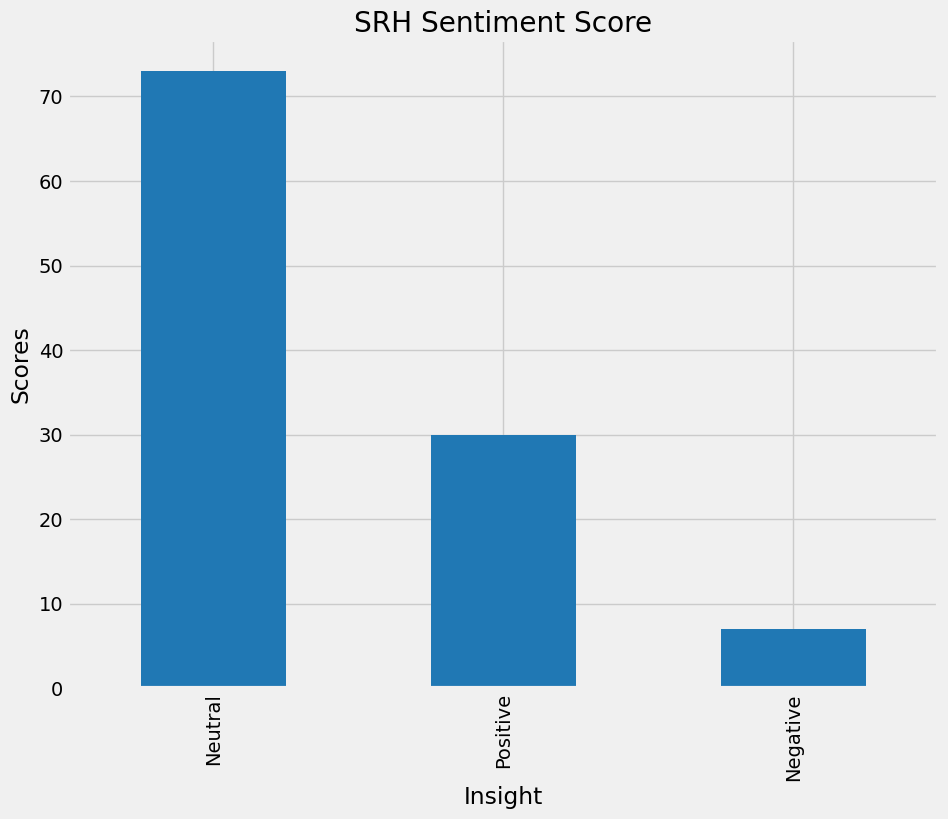

In [115]:
#Plot the values count of sentiment
plt.title("SRH Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

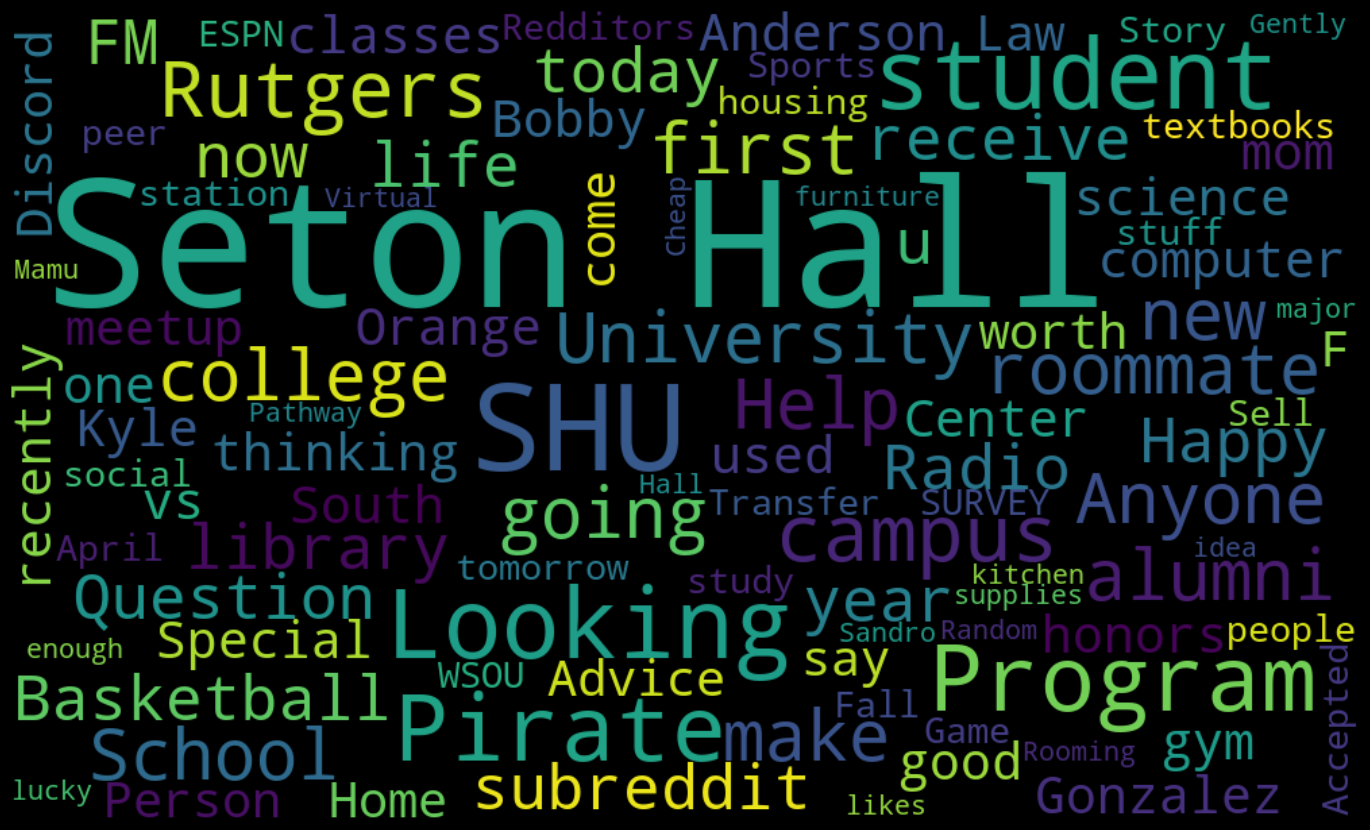

In [116]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");